In [1]:
import os
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

(b) Suppose we want to explore the characteristics of participants who engage in extramarital sexual intercourse (i.e. affairs). Instead of modeling the number of affairs, consider the binary outcome - had an affair versus didn't have an affair. Create a new variable to capture this response variable of interest. What might the advantages and disadvantages of this approach to modeling the data be in this context?

In [2]:
data = sm.datasets.fair.load_pandas()
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)
affairs = data.data
affairs.head


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

<bound method NDFrame.head of       rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0               3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1               3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2               4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3               4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4               5.0  27.0          9.0       1.0        1.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2.0  

(c) Use an appropriate regression model to explore the relationship between having an affair (binary) and other personal characteristics. 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


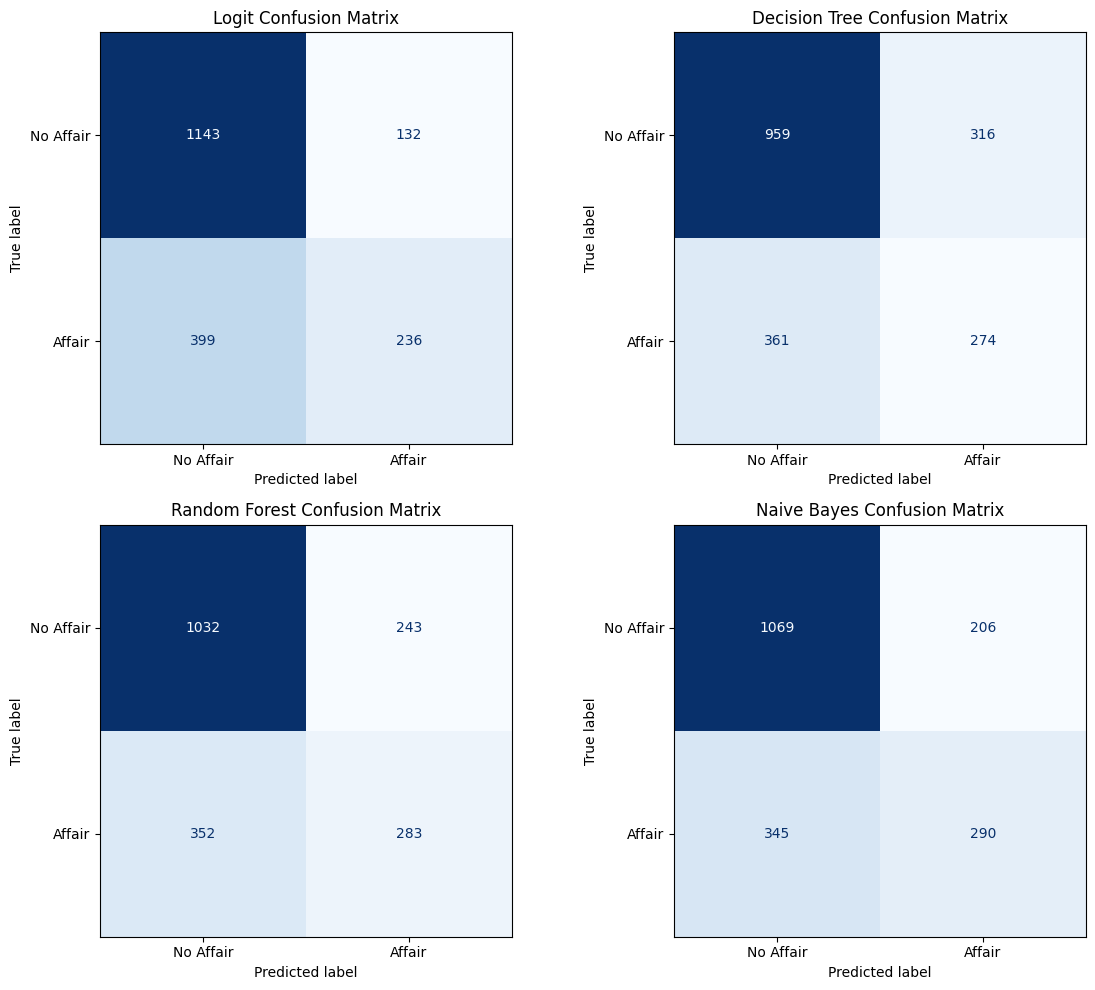

Model Summary for Logit:

                        precision    recall  f1-score   support

Did not have an affair       0.74      0.90      0.81      1275
            Had Affair       0.64      0.37      0.47       635

              accuracy                           0.72      1910
             macro avg       0.69      0.63      0.64      1910
          weighted avg       0.71      0.72      0.70      1910

Model Summary for Decision Tree:

                        precision    recall  f1-score   support

Did not have an affair       0.73      0.76      0.74      1275
            Had Affair       0.47      0.43      0.45       635

              accuracy                           0.65      1910
             macro avg       0.60      0.59      0.60      1910
          weighted avg       0.64      0.65      0.64      1910

Model Summary for Random Forest:

                        precision    recall  f1-score   support

Did not have an affair       0.74      0.80      0.77      1275
   

In [3]:
# Create a new variable where the length of the affair is greater than 0
affairs['had_affair'] = (affairs['affairs'] > 0).astype(int)
display(affairs)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare X and y
X = affairs.drop(columns=['affairs', 'had_affair'])
y = affairs['had_affair']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Logit': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and predict with each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
# Generate confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Affair', 'Affair'])
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

# Initialize the models
models = {
    'Logit': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and predict with each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model Summary for {name}:\n")
    summary_dict = classification_report(y_test, y_pred, output_dict=True, labels=[0, 1], target_names=['Did not have an affair', 'Had Affair'])
    summary_str = classification_report(y_test, y_pred, output_dict=False, labels=[0, 1], target_names=['Did not have an affair', 'Had Affair'])
    print(summary_str)
    predictions[name] = y_pred

(e) Create an artificial test dataset where marital rating varies from 1 to 5 and all other variables are set to their means. Use it as a test dataset to obtain predicted "affair" based on question (c)'s best model for cases in the test data. Interpret your results and use a visualization to support your interpretation.

Remember: if you notice any variables which do not make statistically significant impacts on the response variable based on the part (c) model summary, then remove them to retrieve the best model

In [4]:
# Logistic Regression: Calculate P-Values BEFORE replacing with Means

# Define the predictor variables
predictors = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']

# Add a constant to the predictor variables (intercept)
X = sm.add_constant(affairs[predictors])

# Define the response variable
y = affairs['had_affair']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1327
Time:                        21:02:38   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7257      0.299     12.470      0.000       3.140       4.311
rate_marriage 

In [5]:
# Create a new DF with average values for all vars except the affairs columns

# Pull out non statistically significant cols
prob_e_columns = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ',
       'occupation', 'affairs', 'had_affair']
# Create a new DF
df_affairs_means = affairs.drop(columns=['children', 'occupation_husb']).copy()

# Create a single DF with one row per column of means
df_means = df_affairs_means.mean()
display(df_means)

# Put random values for rate_marriage
rng = np.random.default_rng(7)
random_values = rng.integers(low=1, high=6, size=len(df_affairs_means))  # high is exclusive, so use 6
df_affairs_means['rate_marriage'] = random_values
for col in prob_e_columns:
    if col not in ['rate_marriage', 'affairs', 'had_affair']:
        df_affairs_means[col] = df_means[col]
display(df_affairs_means)
print(df_affairs_means.shape)

rate_marriage     4.109645
age              29.082862
yrs_married       9.009425
religious         2.426170
educ             14.209865
occupation        3.424128
affairs           0.705374
had_affair        0.322495
dtype: float64

,rate_marriage,age,yrs_married,religious,educ,occupation,affairs,had_affair
0,5,29.082862,9.009425,2.42617,14.209865,3.424128,0.111111,1
1,4,29.082862,9.009425,2.42617,14.209865,3.424128,3.230769,1
2,4,29.082862,9.009425,2.42617,14.209865,3.424128,1.400000,1
3,5,29.082862,9.009425,2.42617,14.209865,3.424128,0.727273,1
4,3,29.082862,9.009425,2.42617,14.209865,3.424128,4.666666,1
...,...,...,...,...,...,...,...,...
6361,3,29.082862,9.009425,2.42617,14.209865,3.424128,0.000000,0
6362,5,29.082862,9.009425,2.42617,14.209865,3.424128,0.000000,0
6363,4,29.082862,9.009425,2.42617,14.209865,3.424128,0.000000,0
6364,1,29.082862,9.009425,2.42617,14.209865,3.424128,0.000000,0


(6366, 8)


In [6]:
# Fit the data with the means to a Logistic Regression Model
test_predictors = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ', 'occupation']
# Add a constant to the predictor variables (intercept)
X = sm.add_constant(df_affairs_means[test_predictors])

# Define the response variable
y = df_affairs_means['had_affair']
test_model = sm.Logit(y, X)
test_result = test_model.fit(maxiter=1000)
print(test_result.summary())

         Current function value: 0.628673
         Iterations: 1000
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6362
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               9.861e-05
Time:                        21:02:39   Log-Likelihood:                -4002.1
converged:                      False   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                    0.8520
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage     0.0169      0.019      0.888      0.374      -0.020       0.054
age              -0.2664   5.28e+04  -5.04e-06      1.

S:\code\uw\IMT573\py38_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
